## HEALTHCARE INSURANCE RESEARCH ANALYSIS

### INVESTIGATED BY: Adeleke Adekola Emmanuel

### INDUSTRY: Health

### ABOUT DATASET 📚
This dataset was downloaded from Kaggle.com, uploaded by a user in the last few months. It contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges.  
It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

Age: The insured person's age.

Sex: Gender (male or female) of the insured.

BMI (Body Mass Index): A measure of body fat based on height and weight.

Children: The number of dependents covered.

Smoker: Whether the insured is a smoker (yes or no).

Region: The geographic area of coverage.

Charges: The medical insurance costs incurred by the insured person.

### DATA SOURCE: Kaggle

### Table of Contents
<ul
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Data Assesment Outcome">Data Assesment Outcome</a></li>
<li><a href="#Data Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
📚 Working on this dataset would help us discover the relationship between some factors influencing insurance fee and some other insights we might need to pull. Let's have a sweet ride on.

### Dataset Description 
This dataset has over a thousand rows and 7 columns. 

### Questions for Analysis
1. What is the smoking distribution?
2. What is the relationship between age, charges and the gender?
3. Which region got insured more?
4. What is the relationship between age, smoker and the bmi?
5. Do smokers have a higher insurance fee than does who do not?
6. What effect do children have on charges?
7. Which region smokes more?

We will be using Python libraries for the analysis, such as Pandas, NumPy, Matplotlib and Seaborn. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='wrangling'></a>
# Data Wrangling


### Preliminary Wrangling
General Properties
First, the data is read from the csv file and the first five rows are illustrated below.

In [4]:
hein = pd.read_csv('insurance.csv')
hein.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Let's check the shape of the dataset
hein.shape

(1338, 7)

In [6]:
#Let's check for missing values in our dataset
hein.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing value.

In [8]:
#Let's check for duplicates
hein.duplicated().sum()

1

Oh, we have a duplicate.  
We shall work on that when we start our data cleaning, let's further our investigation.

In [9]:
#Let's check the dataset information and see our datatypes, columns, and rows
hein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Perfect, we have the correct datatypes, and the rows and columns matched with the result we got for shape  
Let's proceed

In [10]:
#Let's check for statistical information on our data
hein.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


All good...  
Now we can move to the next phase of our investigation.

<a id='Data Assesment Outcome'></a>
### Data Assesment Outcome
##### Quality Issues
In our data wrangling, we discovered we have a duplicate.

<a id='Data Cleaning'></a>
## Data Cleaning & PCA
The programmatic data cleaning process:  

Define   
Code   
Test   

Here is a tip for a good analysis practice
- Always make a copy of the dataset you are working on, reason because you might make a mistake with the original dataset and need to get the row or column back, and if you didn't make a copy you will need to start all over again.  
But with a copy, you can easily call it and get ongoing.

In [12]:
#Let's make a copy
hein1 = hein.copy()   #Here we go, our new data now is hein1

In [13]:
#Now we can drop the duplicate in our data
hein1 = hein1.drop_duplicates()

In [17]:
#Let's check for duplicate again
hein1.duplicated().sum()

0

And booommmmmm... The duplicate is gone.  
Now we can start Exploratory Data Analysis(EDA)

<a id='eda'></a>
## Exploratory Data Analysis
> **Tip** Here we'll perform some analysis on the cleaned data, using statistical computation and different visualizations to represent our findings.

#### EDA Questions
1. What is the smoking distribution?
2. What is the relationship between age, charges and the gender?
3. Which region got insured more?
4. What is the relationship between age, smoker and the bmi?
5. Do smokers have a higher insurance fee than does who do not?
6. What effect do children have on charges?
7. Which region smokes more?

## Question 1
What is the smoking distribution?

This question should address the rate at which people smoke  
To do this let's plot a bar chart to represent it.

Text(0, 0.5, 'COUNT')

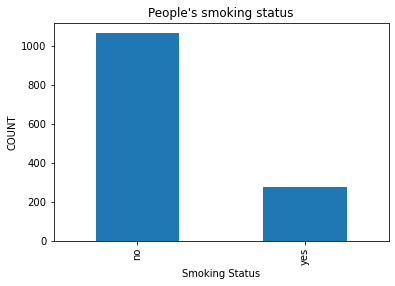

In [89]:
#To plot a bar chart
scount = hein1.groupby(['smoker'])['smoker'].count()
scount.plot(kind='bar')
plt.title("People's smoking status")
plt.xlabel("Smoking Status")
plt.ylabel("COUNT")

This shows more of the population here do not smoke.
So let's see from another angle.

Text(0.5, 1.0, "People's smoking status")

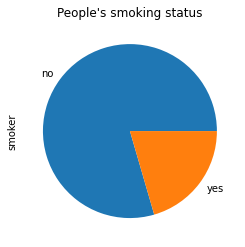

In [88]:
#To plot a pie chart
scount.plot(kind='pie')
plt.title("People's smoking status")

## Question 2
What is the relationship between age, charges and the gender?

Here we will see if the amount paid for health insurance is decided by age or gender.

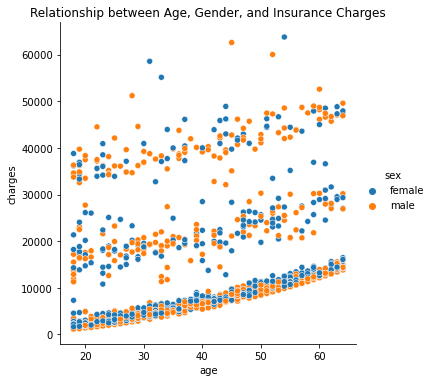

In [59]:
# Create a scatter plot
sns.relplot(x='age', y='charges', data=hein1, hue='sex')  # Color by sex

# Add labels and title
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Relationship between Age, Gender, and Insurance Charges")
plt.show()

From the above plot, we can tell that gender has nothing to do with the amount paid for healthcare insurance, but for age it shows it has an effect on amount paid. The older the insured the higher the amount paid.

## Question 3
 Which region got insured more?
    
Let's see what region takes health insurance more serious, and also see the least concerned region.

In [60]:
#To see the regions we have
hein1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

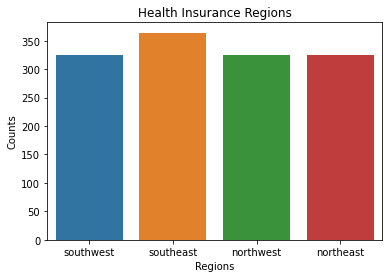

In [65]:
#To do this, let's polt a bar chart to represent it
# Let's count the regions
southwest = len(hein1[hein1['region'] == 'southwest'])
southeast = len(hein1[hein1['region'] == 'southeast'])
northwest = len(hein1[hein1['region'] == 'northwest'])
northeast = len(hein1[hein1['region'] == 'northeast'])

# Create a bar chart
sns.barplot(x=['southwest', 'southeast', 'northwest', 'northeast'], y=[southwest, southeast, northwest, northeast])

#To add labels and title
plt.xlabel("Regions")
plt.ylabel("Counts")
plt.title("Health Insurance Regions")
plt.show()

In [66]:
print([southwest, southeast, northwest, northeast])

[325, 364, 324, 324]


Southeast has the highest number of healthcare insured people, which leaves Northwest and Northeast as the least region, both having same number of entry.

## Question 4
What is the relationship between age, smoker and the bmi?

Let's now check if smoking has an effect on smoker's bmi

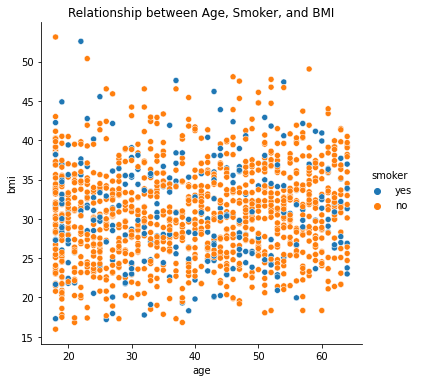

In [67]:
#To do this, let's plot a scatterplot
sns.relplot(x='age', y='bmi', data=hein1, hue='smoker')  # Color by gender

# Add labels and title
plt.xlabel("age")
plt.ylabel("bmi")
plt.title("Relationship between Age, Smoker, and BMI")
plt.show()

This shows smoking doesn't have effect on BMI, reason because those who smoke and those who do not have same bmi distribution regardless of the age

## Question 5
Do smokers have a higher insurance fee than does who do not?

Now let's check if smoking decides how much more paid for health insurance


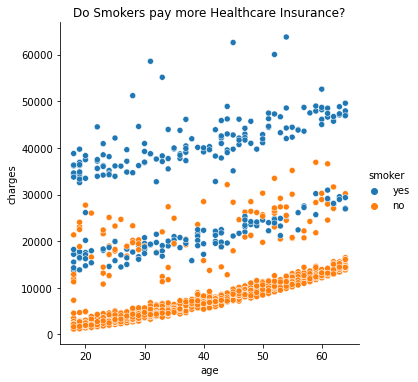

In [90]:
#To do this, let's plot a scatterplot
sns.relplot(x='age', y='charges', data=hein1, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Do Smokers pay more Healthcare Insurance?")
plt.show()

Oh, absolutyely... Smokers pay more on health insurance, and another factor is seen here, that is age as well.  
Let's break it down, if you smoke, you pay higher fee as you grow older.

## Question 6
What effect do children have on charges?

Here is the question, aside smoking and bmi, do children also contribute to amount paid for healthcare insurance?  
Let's find out...

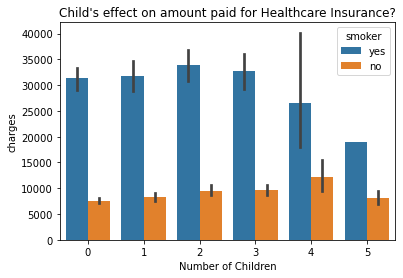

In [91]:
#To do this, let's plot a barplot
sns.barplot(x='children', y='charges', data=hein1, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("Number of Children")
plt.ylabel("charges")
plt.title("Child's effect on amount paid for Healthcare Insurance?")
plt.show()

Fantastic, Let's explain the above plot...  
Regardless of smoking status, the number of kids affects the amount paid on healthcare insurance  
But there is something else to consider;
1. Non smokers pay way lesser than smokers regardless of number of children
2. Smokers with higher number of children pay lesser than other smokers with less children

## Question 7
What region smokes more?

Remember we checked region with highest healthcare insurance right, now let's see the region that smokes more.

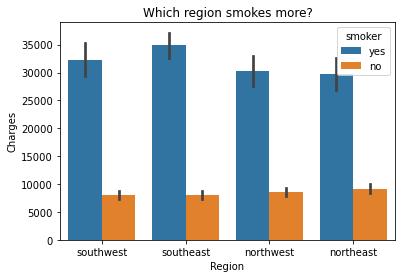

In [80]:
#To do this, let's plot a barplot
sns.barplot(x='region', y='charges', data=hein1, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Which region smokes more?")
plt.show()

Ah ha, this clearly shows 
"smokers are not only liable to die young but also to pay more for Healthcare Insurance" -AnalystAdekola 2024  
Southeast region smokes more than the other, should we say because they have the higher number of health insured?  

<a id='conclusions'></a>
# Conclusions

What an analysis!!!  
We have pulled so much insights from this Healthcare Insurance dataset that would help our community to grow better and understand what is needed to pay lesser health insurance fee

Insights pulled in this analysis
1. More of the population here do not smoke.
2. Gender has nothing to do with the amount paid for healthcare insurance, but for age it shows it has an effect on amount paid. The older the insured the higher the amount paid.
3. Southeast has the highest number of health insured people(364), which leaves Northwest and Northeast as the least region, both having same number of entry(324)
4. Smoking doesn't have effect on BMI, reason because those who smoke and those who do not have same bmi distribution regardless of the age
5. Smokers pay more on healthcare insurance, and another factor is seen here, that is age as well. Let's break it down, if you smoke, you pay higher fee as you grow older.
6. Regardless of smoking status, the number of kids affects the amount paid on healthcare insurance
But there is something else to consider;  
Non smokers pay way lesser than smokers regardless of number of children  
Smokers with higher number of children pay lesser than other smokers with less children  
7. Southeast region smokes more than the other.


### Recommendations
***TO PAY A LOWER AMOUNT FOR HEALTH INSURANCE*** Stop Smoking and Save on Healthcare Insurance!
Having a good health reduces the amount spent on health insurance, quitting smoking is one of the best things you can do for your health and your account balance

 "smokers are not only liable to die young but also to pay more for Healthcare Insurance" -AnalystAdekola 2024